# Avance 
---
$[X] Ejeo 1$ 

$[X] Ejeo 2$

$[X] Ejeo 3$

$[X] Ejeo 4$

# Librerias


In [6]:
from math import atan
import math
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
from random import randint

### **Función de trabajo**

In [7]:
# cambie ha global evalF
a = 0
b = 3
epsilon = 0.001
evalF = 0

In [8]:
def f(x):
  global evalF
  evalF += 1
  func = 0.65-(0.75/(1+x**2))-0.65*x*(atan(1/x))
  return(func)

# **Búsqueda Exhaustiva**


In [9]:
# Búsqueda exhaustiva
def busqueda_exhaustiva(a, b, n):
    """
    a = int||float Inicio del intervalo
    b = int||float Fin del intervalo
    n = int||float Numero de divisiones
    return: intervals and total evaluations
    """ 
    # Ocurre error de divisióón por cero debido a que se calcula f(x1) y x1 = a y a = 0
    # por eso añadi 0.001
    X1 = a
    Ax = (b-a)/n
    X2 = X1 + Ax
    X3 = X2 + Ax
    #evalF = 0
    #############################
    # He añadido esta linea para saltarme el cero inicial
    X1 = X2; X2 = X3; X3 = X2+Ax
    #################################
    
    f1 = f(X1)
    f2 = f(X2) 
    f3 = f(X3)
    # y esta linea, que basicamente es para saltarme la evaluación en cero
    # ya que la función ahíí no esta definida
    #f1 = f2; f2 = f3; f3 = f(X3)
    while X3 <= b:
        if X1 != 0 and X2 != 0 and X3 != 0:
            if (f1>=f2 and f2<=f3):
                #X1 = round(X1, 3); X3 = round(X3, 3) # Si redondeo así, se come el último decimal si es 0
            
                x1 = "{0:.3f}".format(X1)
                x3 =  "{0:.3f}".format(X3)
                #result = (x1[:], x3[:]) # Me imprime con ' '
                evalFF = ceil(((float(x3)-a)/Ax)+0.1)
                return (f"({x1},{x3})\n{(evalF)}")
            
        else:
            X1 = X2
            X2 = X3
            X3 = X2+Ax
            

        #print(X1, X2, X3)  
        X1 = X2; X2 = X3; X3 = X2+Ax
        f1 = f2; f2 = f3; f3 = f(X3)
        
    return ("No existe un mínimo en (a, b), o un punto extremo (a ó b) es el mínimo")

# **División de intervalos por la mitad**

In [10]:
# División de intervalos por la mitad
def div_intervalos(a,b,epsilon):
    """
    a = int||float Inicio del intervalo
    b = int||float Fin del intervalo
    epsilon = float tolerancia
    return: intervals and total evaluations
    """ 
    Xm = (a+b)/2
    L = b-a
    Iter = 0
    while abs(L)>epsilon: 
        X1 = a+L/4
        X2 = b-L/4
        Iter+= 1
        if f(X1)<f(Xm): 
            b = Xm 
            Xm = X1
        else: 
            if f(X2)<f(Xm): 
                a = Xm 
                Xm = X2
            else: 
                a = X1 
                b = X2
        L = b-a
        

        
    A = "{0:.3f}".format(a)
    B =  "{0:.3f}".format(b)
    #result = (x1[:], x3[:]) # Me imprime con ' '
    evalFF = 3+(2*Iter-2)
    # Las tres evaluaciones del inicio más las dos que hace en cada iteración 
    # y el -2 es para contrarrestar el error (funciono en hackerrank)
    return (f"({A},{B})\n{evalFF}")

# **Búsqueda Fibonacci**

In [11]:
# Búsqueda de Fibonacci
def fibonacci_dinamico(n, memo={0:1, 1:1}):
    """fibonacci eficiente
    n int numero fibonacci a calcular
    memo dict diccionario para la memoization
    """
    if n == 1 or n == 2: 
        return 1

    try:
        return memo[n]
    except KeyError: 
        resultado = fibonacci_dinamico(n-1, memo) + fibonacci_dinamico(n-2, memo)
        memo[n] = resultado 
        #print(memo.values())
        return (resultado)

def search_fib(a,b,n):
    """
    a = int||float Inicio del intervalo
    b = int||float Fin del intervalo
    n = int último elemento de la sucesión de Fibonacci que va a utilizar el algoritmo
    return: intervals and total evaluations
    """ 
    L = (b-a)
    k = 2
    conteo = 1
    while k <= n:
        
        #Lk_start = (F[n-k]/F[n])*L
        Lk_start = (fibonacci_dinamico((n+1)-k)/fibonacci_dinamico(n+1))*L
        X1 = a+Lk_start; X2 = b-Lk_start
        
        if f(X1)    > f(X2): 
            a = X1
        else: 
            b = X2
            
        #print(a,b)
        # Recordemos que en cada iteración se repite un número de fibonacci 
        # por lo que al evaluar dos veces la función podemos contarla
        # como una
        conteo += 1
        k += 1
        
    A = "{0:.3f}".format(a)
    B =  "{0:.3f}".format(b)
    evalFF = conteo 
    return (f"({A},{B})\n{evalFF}")

# **Sección dorada**

In [12]:
# Sección dorada
def normalizer(w, a, b): 
    return (w*(b-a)+a)

def sec_dorada(a,b,epsilon):
    """
    a = int||float Inicio del intervalo
    b = int||float Fin del intervalo
    epsilon = float tolerancia
    return: intervals and total evaluations
    """
    #x = randint(a, b)
    #x = normalizer(x, a, b)
    
    aw = 0; bw = 1; Lw = 1
    conteo = 1
    while Lw > (epsilon/(b-a)):
        w1 = round(aw + 0.618*Lw, 10)
        w2 = round(bw - 0.618*Lw, 10)
        #print(w1, w2)
        W1 = normalizer(w1, a, b)
        W2 = normalizer(w2, a, b)
        if f(W1) < f(W2): 
            aw = w2
        else: 
            bw = w1
      
     
        conteo += 1
        Lw = bw - aw


    # Esto ya es el output
    
    #print(aw, bw)
    Aw = normalizer(aw, a, b)
    Bw = normalizer(bw, a, b)
    #print(Aw, Bw)
    A = "{0:.3f}".format(Aw)
    B =  "{0:.3f}".format(Bw)
    evalFF = conteo 
    return (f"({A},{B})\n{evalFF}")


In [13]:
#a = 0 
#b = 3 
#epsilon = 0.01
#print(sec_dorada(a,b,epsilon))

# **Actividad**

 ## **Ejeo. 1**
 ---
**Usando los métodos anteriores minimice la siguiente
función:**

> $f(x)$ = 0.65 - [$\frac{0.75}{1 + x^2}$] - 0.65$\ast$x$\ast$$\tan^{-1}$($\frac{1}{x}$)

**En el intervalo [0, 3]. Se requiere una precisión de 0.001 ($\epsilon$=0.001)**


### **Evaluando con búsqueda exhaustiva**
---

In [14]:
n = 6000
print(busqueda_exhaustiva(a, b, n))
# Dada la variable global que implemente para el conteo en esta función, 
# si se ejecuta esta casilla varias veces, cada vez arrojara que son más evaluaciones. 
# Recomiendo que si se corre el jupyter, sea todo.

(0.481,0.482)
963


### **Evaluando con división de intervalos por la mitad**
---

In [15]:
print(div_intervalos(a, b, epsilon))

(0.480,0.481)
25


### **Evaluando con búsqueda fibonacci**
---

In [16]:
#n=19 -> fibonacci = 4181
#n=18 -> fibonacci = 2584
#|3000-4181| = 1181
#|3000-2584| = 416
# Elegimos n = 18 
n = 18
print(search_fib(a, b, n))
#print(search_fib(2, 10, 15))


(0.480,0.481)
18


### **Evaluando con sección dorada**
---

In [17]:
print(sec_dorada(a,b,epsilon))

(0.481,0.481)
18


## **Ejeo. 2** 
---

**Valide sus resultados (número de evaluaciones de $f$) haciendo el cálculo teórico. Muestre todo el procedimiento.**

### **Búsqueda Exhaustiva teórico**
---
Sabemos que los parámeros de entrada para búsqueda exhaustiva son **a**, **b** y **n**.
Donde **n** corresponde a las divisiones del intervalo, para obtenerlo hacemos lo siguiente.

Dada la formula: 

>$\frac{2(b-a)}{n} = \epsilon$

 donde: $\epsilon = 0.001, a = 0, b = 3$

Despejamos **n**, sustituimos **a**, **b** y resolvemos:

> $n = \frac{6}{0.001} = 6000$

por lo tanto **necesitamos seís mil divisiones** para búsqueda exhaustiva para una precisión de 0.001.

> Búsqueda exhaustiva es la única función que recibe un número para hacer las divisiones de intervalos, dicho número se obtiene de la forma anterior, que son 6000, pero tengo entendido que _n_, en el caso de las formulas para los otros métodos, corresponde al número de evaluaciones a la función que se hacen y dichos calculos cuadran con lo que mis funciones retornan. No sé como validar mi resultado haciendo calculo teoríco en el caso de esta función. Lo siento.

### **División de intervalos por la mitad teórico** 
---

Tenemos: 

$$
(\frac{1}{2})^\frac{n}{2} \ast L_0
$$

Despejando **n** para obtener el número de evaluaciones dada una precisión $\epsilon$:
$$
n = 2 \ast \frac{log(\epsilon/L_0)}{log(1/2)}
$$

Donde $L_0$ es la longitud del intervalo inicia. 

Sustituyendo $L_0 = (b-a)$ y $\epsilon = 0.001$
tenemos: 

$$
n = 2 \ast \frac{log(0.001/(3-0))}{log(1/2)}
= 2 \ast \frac{log(0.001/(3))}{log(0.5)} \approx 23.101 \approx 23 
$$ evaluaciones

En nuestro código hemos obtenido **25** $\neq$ **23**



In [18]:
numerador = 2*(math.log(epsilon/(b-a),10))
denominador = math.log(1/2,10)
# 25
print(ceil(numerador/denominador), numerador/denominador)

24 23.101493570766486


### **Fibonacci teórico**

Para obtener el número de evaluaciones en el caso de Fibonacci hacemos uso del mismo razonamiento usado en "Evaluando con búsqueda fibonacci":

Sabemos que la longitud final del intervalo para cierto n es: 

> $\frac{1}{F_{n}}\ast L$

donde L = (b - a)

por lo que si se requiere de una precisión de 0.001
hacemos: 

> $\frac{(b-a)}{F_{n}} = 0.001$

despejamos para $F_{n}$:

> $F_{n} = \frac{(b-a)}{0.001}$

sustituyendo el intervalo [a, b]:

> $F_{n} = \frac{(3-0)}{0.001} = 3000$

Requerimos que nuestra **n** corresponda
al número $\pm$3000 de la sucesión de fibonacci.
Dicho **n** es $n=18$.
Por lo que el número de evaluaciones obtenidas con la función **es correcto** ya que para $fibonacci\_dinamico(n=18)$ obtenemos:


$$ fibonacci\_dinamico(n=18) = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]
$$


In [19]:
print(fibonacci_dinamico(18))

2584


### **Sección dorada teórico**
---

Tenemos: 
$$
0.618^{(n-1)} \ast (b-a)
$$
Ya que contamos con el valor de $\epsilon$
despejamos **n** para obtener el número de evaluaciones necesarias de la función objetivo. 

Despejando **n** obtenemos: 
$$
n = \frac{log_{0.618}(\epsilon/(b-a))}{log_{0.618}(0.618)}+1
$$

Sabemos que: $a = 0; b = 3; \epsilon = 0.001$
Sustituyendo tenemos: 
$$
n = \frac{log_{0.618}(0.001/(3-0))}{log_{0.618}(0.618)}+1 = 17.636026 \approx 18
$$



In [20]:
# Para Seccion dorada
numerador = math.log(epsilon/(b-a),0.618)
denominador = math.log(0.618,0.618)
result = (numerador/denominador)+1
print(math.ceil(result), result)

18 17.636026440155415


## Ejeo. 3
---

**Grafique $f(x)$ en el intervalo $[0, 3]$**

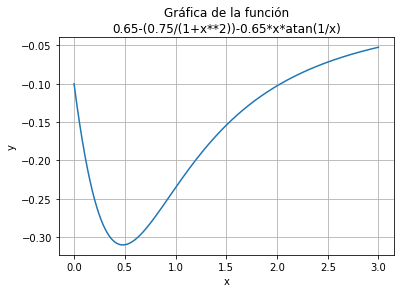

In [21]:
x = np.arange(0.0001,3,0.001) # Sale un mensaje sobre la división por cero
# por eso puse mejor 0.0001
y = [f(i) for i in x]

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Gráfica de la función\n0.65-(0.75/(1+x**2))-0.65*x*atan(1/x)')
plt.show()

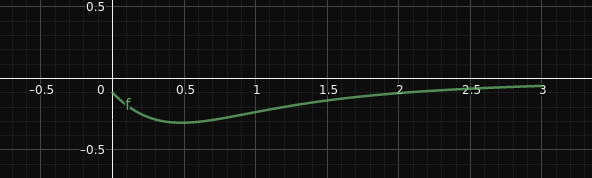

## Ejeo. 4
---
**Indique cuál método es el más eficiente y explique por
qué.**
> Para validar nuestra elección vamos a hacer uso de la reducción fraccional $(RF(N) = \frac{L_{N}}{L_{0}})$

Tenemos entonces las siguientes formulas: 

- Búsqueda Exhaustiva: $L_{N} = \frac{2L_{0}}{N}$

- División de intervalos por la mitad: $L_{N} = (\frac{1}{2})^\frac{N}{2} \ast L_{0}$

- Búsqueda Fibonacci: $L_{N} = \frac{1}{F_{N}} \ast L_{0}$

- Sección Dorada: $L_{N} = (0.618)^{N-1} \ast L_{0}$


Procedemos a evaluar para $N = 5, 10, 20, 40, 80$

**Para N = 5**
> Solo efectuaremos el calculo completo de la primer N para cada método, para mostrar el procedimiento. 

- **Búsqueda Exhaustiva**: 

Sustituyendo $L_{N} = \frac{2L_{0}}{N}$ en $(RF(N) = \frac{L_{N}}{L_{0}})
$ para N = 5

Tenemos:
$$
RF(N) = \frac{\frac{2L_{0}}{5}}{L_{0}} = \frac{2L_{0}}{5} \div \frac{L_{0}}{1} = 
\frac{2L_{0}}{5L_{0}} = \frac{2}{5} = 0.4
$$

- **División de intervalos por la mitad**

Sustituyendo $L_{N} = (\frac{1}{2})^\frac{N}{2} \ast L_{0}$
 en $(RF(N) = \frac{L_{N}}{L_{0}})
$ para N = 5

Tenemos: 
$$
RF(N) = \frac{(\frac{1}{2})^{\frac{5}{2}} \ast L_{0}}{L_{0}} = (\frac{1}{2})^{\frac{5}{2}} = 0.1767
$$

- **Búsqueda Fibonacci**

Sustituyendo $L_{N} = \frac{1}{F_{N}} \ast L_{0}$ en $(RF(N) = \frac{L_{N}}{L_{0}})
$ para N = 5

Tenemos: 
$$
RF(N) = \frac{\frac{1}{F_{5}} \ast L_{0}}{L_{0}} = \frac{1}{F_{5}} = \frac{1}{8} = 0.125
$$

- **Sección Dorada**

Sustituyendo $L_{N} = (0.618)^{N-1} \ast L_{0}$ en $(RF(N) = \frac{L_{N}}{L_{0}})
$ para N = 5

Tenemos: 
$$
RF(N) = \frac{(0.618)^{5-1} \ast L_{0}}{L_{0}} = (0.618)^{4} = 0.1458
$$

Evaluando para las N's propuestas tenemos: 

1. Búsqueda Exhaustiva
  * N = 10: 0.2
  * N = 20: 0.1
  * N = 40: 0.05
  * N = 80: 0.025
2. División de intervalos por la mitad
  * N = 10: 0.03125
  * N = 20: 0.00097
  * N = 40: 9.536e-07
  * N = 80: 9.094e-13
3. Búsqueda Fibonacci
  * N = 10: 0.02941
  * N = 20: 2.391e-4
  * N = 40: 1.581e-8
  * N = 80: 6.909e-17
4. Sección dorada
  * N = 10: 0.0131
  * N = 20: 0.00010
  * N = 40: 7.0558e-09
  * N = 80: 3.0767e-17


> A partir de las evaluaciones anteriores y los resultados teoricos obtenidos, podemos determinar que el método más eficiente corresponde a la sección dorada debido a su crecimiento respecto a N, a saber, conforme N aumente, el costo en tiempo baja considerablemente más frente a los demás métodos. 